<a href="https://colab.research.google.com/github/VictorFu0717/AI/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


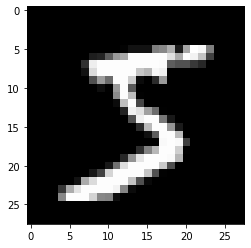

In [ ]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse顏色反過來: 顏色後面+ _r 
# 0是黑色,255是白色,預設是黃紫色
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 256 + 256(bias)
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


bias偏移:事先設定一個值,利用斜率調整到loss,讓大家事先扣掉這個值,從0開始激活

In [ ]:
# 一個神經元（兩個機率）: BinaryCrossEntropy
# 多個神經元 : pilog(1/qi): CategoricalCrossEntropy
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), 
              metrics=["accuracy"],
              optimizer="adam")
# 無腦選adam

mse的坡度變動小,要訓練很久,因此不適合用在機率,適合用在回歸
cross entropy交叉商(log loss)坡度變動大

全局最佳vs局部最佳：optimizer（優化器）
動量優化：Wf= 現在坡度＋比例 x 前面的速度
動態步長：調整步長,剛開使步長大,一段時間後小
adam：動量＋動態

In [ ]:
# 做one-hot encoding
# num_classes 最後判定為0~9, 設定 10 欄
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])


5
5


In [ ]:
# 讓x變一維
x_train_shape = x_train.reshape(-1, 784)/255.0
x_test_shape = x_test.reshape(-1, 784)/255.0
# scale 調整輸入的值(-1~1)or(0~1),來配合隨機的係數w1,w2....

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
   EarlyStopping(patience=5, restore_best_weights=True) 
]
#patience:這裡設定連續5次val_loss沒有變好就停下來
model.fit(x_train_shape,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)
#batch依圖片大小來調：圖片大調大
#epochs總共訓練的次數
#verbose進度條

Epoch 1/50
270/270 - 2s - loss: 0.3763 - accuracy: 0.8952 - val_loss: 0.1695 - val_accuracy: 0.9538
Epoch 2/50
270/270 - 2s - loss: 0.1682 - accuracy: 0.9512 - val_loss: 0.1154 - val_accuracy: 0.9690
Epoch 3/50
270/270 - 2s - loss: 0.1177 - accuracy: 0.9661 - val_loss: 0.0998 - val_accuracy: 0.9722
Epoch 4/50
270/270 - 2s - loss: 0.0896 - accuracy: 0.9739 - val_loss: 0.0844 - val_accuracy: 0.9758
Epoch 5/50
270/270 - 2s - loss: 0.0689 - accuracy: 0.9805 - val_loss: 0.0794 - val_accuracy: 0.9772
Epoch 6/50
270/270 - 2s - loss: 0.0560 - accuracy: 0.9840 - val_loss: 0.0762 - val_accuracy: 0.9782
Epoch 7/50
270/270 - 2s - loss: 0.0464 - accuracy: 0.9873 - val_loss: 0.0717 - val_accuracy: 0.9787
Epoch 8/50
270/270 - 2s - loss: 0.0379 - accuracy: 0.9900 - val_loss: 0.0695 - val_accuracy: 0.9782
Epoch 9/50
270/270 - 2s - loss: 0.0310 - accuracy: 0.9920 - val_loss: 0.0738 - val_accuracy: 0.9790
Epoch 10/50
270/270 - 2s - loss: 0.0266 - accuracy: 0.9934 - val_loss: 0.0696 - val_accuracy: 0.9807

In [ ]:
model.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9788


[0.06772532314062119, 0.9787999987602234]

In [ ]:
from sklearn.metrics import confusion_matrix
# sklearn: predict_proba/predict
# tensorflow: predict/predict_classes
pre = model.predict_classes(x_test_shape)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       columns=[str(i) + "(預測)" for i in range(10)],
       index=[str(i) + "(正確)" for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),968,0,1,2,1,2,2,1,3,0
1(正確),0,1123,3,1,0,1,2,1,4,0
2(正確),4,1,1011,0,3,0,2,5,6,0
3(正確),1,0,6,988,0,3,0,3,6,3
4(正確),0,0,3,1,968,0,4,2,0,4
5(正確),2,1,0,12,1,867,4,1,2,2
6(正確),5,3,0,1,5,3,939,0,2,0
7(正確),2,4,9,2,0,0,0,1007,1,3
8(正確),4,0,2,7,6,4,1,4,943,3
9(正確),2,4,0,6,11,4,0,5,3,974


In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    plt.imshow(false_img[i])
    t = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(t)
    plt.axis("off")

In [ ]:
# Pillow
from PIL import Image
# RGB, RGBA, L(gray)
fn = input("輸入檔名:")
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = np.array(img)
img_np_r = img_np.reshape(1, 784)
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(i, "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", ans)
plt.imshow(img_np)